 <title> Fixing Holidays</title>

 # Fixing Holidays

Since our dataset had tonnes of anomalies we had to scrape the internet for a dataset on holidays to be appended to our dataset for better yields in results.
This notebook was worked on exclusively to get detailed information on the number, kinds, duration and popularity of holidays that can affect the ATM withdrawal patterns.
Furthermore, logically we know this will heavily impact the withdrawals but statistically how majorly it would influence was also one of the debating question which needed to be answered.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

## Merging Holiday Dataframe with Aggregated Data

We look at the acquired dataset for holidays corresponding to the dates in our withdrawal dataset.
This dataset also has a categorical feature for the type of holiday which would structure our dataset better.

In [47]:
holiday_df_filtered = pd.read_csv('../data/final_holidays.csv')
holiday_df_filtered['Date'] = pd.to_datetime(holiday_df_filtered['Date'], format='%d-%m-%Y')

# Agregando 7 años para que la data cuadre con los feriados extraidos, solo con fines de prueba
holiday_df_filtered['Date'] = holiday_df_filtered['Date'] + pd.DateOffset(years=7)

Here we can see the structure of the acquired dataset on Holidays. 'Type' column is noteworthy for classification of dates in terms of impact on the withdrawal instead of names of holidays/festivals.

In [48]:
holiday_df_filtered.head(17)

,Date,Name,Weekday,Type
0,2020-01-01,New Year's Day,MONDAY,Restricted Holiday
1,2020-01-13,Makar Sankranti,SUNDAY,Restricted Holiday
2,2020-01-14,Pongal,MONDAY,Restricted Holiday
3,2020-01-18,Guru Govind Singh Jayanti,FRIDAY,Restricted Holiday
4,2020-01-25,Milad un-Nabi/Id-e-Milad,FRIDAY,Gazetted Holiday
5,2020-01-26,Republic Day,SATURDAY,Gazetted Holiday
6,2020-02-14,Valentine's Day,THURSDAY,Observance
7,2020-02-19,Shivaji Jayanti,MONDAY,Restricted Holiday
8,2020-03-10,Maha Shivaratri/Shivaratri,SUNDAY,Gazetted Holiday
9,2020-03-26,Holika Dahana,MONDAY,Restricted Holiday


Hence we dropped the 'Name' column and 'Weekday' column as we already have that in the original dataset.

In [49]:
holiday_df_filtered_for_merge = holiday_df_filtered.drop(['Name', 'Weekday'], axis=1)

holiday_df_filtered_for_merge.head()

,Date,Type
0,2020-01-01,Restricted Holiday
1,2020-01-13,Restricted Holiday
2,2020-01-14,Restricted Holiday
3,2020-01-18,Restricted Holiday
4,2020-01-25,Gazetted Holiday


A small fix on datetime format to have continuity in format

In [50]:
aggregated_data = pd.read_csv('../data/aggregated_atm_data.csv')
aggregated_data['Transaction Date'] = pd.to_datetime(aggregated_data['Transaction Date'], format='%Y-%m-%d')

# Agregando 7 años para que la data cuadre con los feriados extraidos, solo con fines de prueba
aggregated_data['Transaction Date'] = aggregated_data['Transaction Date'] + pd.DateOffset(years=7)

# Eliminando columnas que no nos darán (todo relacionado al clima y si hoy es feriado o mñn y
# cosas así que luego serán generadas)
aggregated_data.drop(['Weekday', 'maxtempC', 'mintempC',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday',
       'isYesterdayWeekday', 'isTomorrowWeekday', 'isWeekday'], axis=1, inplace=True)

In [51]:
# AGREGANDO EL DÍA DE SEMANA
# aggregated_data['Weekday'] = aggregated_data['Transaction Date'].dt.day_name().str.upper()
aggregated_data.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
0,Big Street ATM,2020-01-01,125,26,99,429200,75500,353700
1,Mount Road ATM,2020-01-01,144,49,95,377900,155200,222700
2,Airport ATM,2020-01-01,78,58,20,315400,269100,46300
3,KK Nagar ATM,2020-01-01,268,176,92,1290200,927700,362500
4,Christ College ATM,2020-01-01,95,39,56,427100,235700,191400


## Actual Merge Operation

<p> Left Outer Join is performed with left = ATM Data and right = Holidays Data on the Date columns because we want to retain all rows from the ATM Data and join rows only matching date is found in Holidays Data and otherwise the holiday columns can be left with NaN </p>

In [52]:
aggregated_data_with_holidays = aggregated_data.merge(right=holiday_df_filtered_for_merge, how='left', left_on='Transaction Date', right_on='Date')
aggregated_data_with_holidays.drop('Date', axis=1, inplace=True)

In [53]:
aggregated_data_with_holidays.loc[(aggregated_data_with_holidays['Transaction Date'] > pd.to_datetime('2020-10-29')) &
                                   (aggregated_data_with_holidays['Transaction Date'] <= pd.to_datetime('2020-11-01'))&
                                   (aggregated_data_with_holidays['ATM Name'] == "Big Street ATM")]
# aggregated_data_with_holidays.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Type
1501,Big Street ATM,2020-10-30,108,39,69,381000,155200,225800,NaN
1506,Big Street ATM,2020-10-31,118,47,71,495100,229300,265800,Observance
1511,Big Street ATM,2020-11-01,133,50,83,572700,262900,309800,NaN


## Verifying whether number of rows before and after merge are the same

In [54]:
bs_data = aggregated_data[aggregated_data['ATM Name'] == 'Big Street ATM']
bs_data_holiday = aggregated_data_with_holidays[aggregated_data_with_holidays['ATM Name'] == 'Big Street ATM']
print(len(bs_data))
print(len(bs_data_holiday))

1625
1625


## Filling in NaN values in Type Column with No Holiday value
Because Left Outer Join was performed, all unmatched dates will have NaN in Type column of new merged DataFrame

In [55]:
aggregated_data_with_holidays.fillna(value='No Holiday', inplace=True)

aggregated_data_with_holidays.head(6)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Type
0,Big Street ATM,2020-01-01,125,26,99,429200,75500,353700,Restricted Holiday
1,Mount Road ATM,2020-01-01,144,49,95,377900,155200,222700,Restricted Holiday
2,Airport ATM,2020-01-01,78,58,20,315400,269100,46300,Restricted Holiday
3,KK Nagar ATM,2020-01-01,268,176,92,1290200,927700,362500,Restricted Holiday
4,Christ College ATM,2020-01-01,95,39,56,427100,235700,191400,Restricted Holiday
5,Big Street ATM,2020-01-02,108,32,76,401000,124100,276900,No Holiday


## Fixing Weekday
Applying the strftime('%A') function on each row of the data on the Date column will give the correct Weekday

This fix was done as we saw a few anomalies in the weekday column where few weekdays were repeated on successive dates.

In [56]:
aggregated_data_with_holidays['Weekday'] = aggregated_data_with_holidays.apply(lambda x: x['Transaction Date'].strftime('%A').upper(), axis=1)

In [57]:
aggregated_data_with_holidays.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Type,Weekday
0,Big Street ATM,2020-01-01,125,26,99,429200,75500,353700,Restricted Holiday,WEDNESDAY
1,Mount Road ATM,2020-01-01,144,49,95,377900,155200,222700,Restricted Holiday,WEDNESDAY
2,Airport ATM,2020-01-01,78,58,20,315400,269100,46300,Restricted Holiday,WEDNESDAY
3,KK Nagar ATM,2020-01-01,268,176,92,1290200,927700,362500,Restricted Holiday,WEDNESDAY
4,Christ College ATM,2020-01-01,95,39,56,427100,235700,191400,Restricted Holiday,WEDNESDAY


## Verifying whether Fix was proper (check 2012-05-01 onwards which was a problem before)

In [ ]:
# No lo ejecuté
# bs_data = aggregated_data_with_holidays[aggregated_data_with_holidays['ATM Name'] == 'Big Street ATM']
# bs_data[bs_data['Festival Religion'] == 'N']

## Adding Weekend as Holidays (only if they weren't marked as holidays before itself)


In [11]:
# aggregated_data_with_holidays['Type'] = aggregated_data_with_holidays.apply(lambda x: 
#                                                                             'Weekend' if x['Type'] == 'No Holiday' 
#                                                                             and x['Weekday'] in ['SATURDAY', 'SUNDAY'] 
#                                                                             else x['Type'], axis=1)


## Fixing Holiday Sequence and breaking it into three columns. Also Fixing Working Day and converting it to IsHoliday

<p> A day is a Holiday only if it is a Gazetted or Restricted Holiday </p>
<p> Weekends are not considered as holidays but they still get importance because of the IsWeekday column being stored as False for Weekends </p>
<p> Logic is, for each row in the dataframe, find yesterday's date and tomorrow's date, then check whether all three of them are holidays or not, by checking whether they are present in the holidays dataframe and thus get the overall sequence for a single day and append holiday status of each day to their respective lists which would end up becoming the three new isHoliday columns in the DataFrame </p>

In [58]:
all_holiday_dates = set(holiday_df_filtered['Date'])
holiday_sequence_list = []
today_holiday_list = []
yesterday_holiday_list = []
tomorrow_holiday_list = []
for i in range(len(aggregated_data_with_holidays)):
    # iloc[row_number_index, column_number_index]
    # Transaction Date is second column so its index is 1
    today_date = aggregated_data_with_holidays.iloc[i, 1]
    yesterday_date = today_date - timedelta(days=1)
    tomorrow_date = today_date + timedelta(days=1)
    
    # Hardcode Holiday Sequence for first and last days in dataset
    if today_date == datetime(2020, 1, 1): # MODIFIQUÉ LA FECHA
        holiday_sequence = 'WHH'
        
    elif today_date == datetime(2024, 12, 31): # MODIFIQUÉ LA FECHA
        holiday_sequence = 'HHH'
        
    # Else for today, yesterday and tomorrow check whether they are a holiday or a weekend date, if yes, append "H", else "W"
    else:
        holiday_sequence = ""
        for date in [yesterday_date, today_date, tomorrow_date]:
            # if (date in all_holiday_dates) or (date.strftime('%A') in ['Saturday', 'Sunday']):
            if date in all_holiday_dates:
                holiday_sequence += "H"
            else:
                holiday_sequence += "W"
    
    holiday_sequence_list.append(holiday_sequence)
    yesterday_holiday_list.append(True if holiday_sequence[0] == 'H' else False)
    today_holiday_list.append(True if holiday_sequence[1] == 'H' else False)
    tomorrow_holiday_list.append(True if holiday_sequence[2] == 'H' else False)

## Adding the Holiday Sequence column
Taking a deepcopy of the dataset to append the holiday sequence generated.


In [59]:
new_agg = aggregated_data_with_holidays.copy(deep=True)
new_agg['Holiday Sequence'] = holiday_sequence_list
new_agg['isYesterdayHoliday'] = yesterday_holiday_list
new_agg['isHoliday'] = today_holiday_list
new_agg['isTomorrowHoliday'] = tomorrow_holiday_list

In [60]:
new_agg.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Type,Weekday,Holiday Sequence,isYesterdayHoliday,isHoliday,isTomorrowHoliday
0,Big Street ATM,2020-01-01,125,26,99,429200,75500,353700,Restricted Holiday,WEDNESDAY,WHH,False,True,True
1,Mount Road ATM,2020-01-01,144,49,95,377900,155200,222700,Restricted Holiday,WEDNESDAY,WHH,False,True,True
2,Airport ATM,2020-01-01,78,58,20,315400,269100,46300,Restricted Holiday,WEDNESDAY,WHH,False,True,True
3,KK Nagar ATM,2020-01-01,268,176,92,1290200,927700,362500,Restricted Holiday,WEDNESDAY,WHH,False,True,True
4,Christ College ATM,2020-01-01,95,39,56,427100,235700,191400,Restricted Holiday,WEDNESDAY,WHH,False,True,True


In [61]:
new_agg.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Type', 'Weekday', 'Holiday Sequence',
       'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday'],
      dtype='object')

In [62]:
# COPIANDO SOLO LA DATA DE BIG STREET ATM (OJO)
bs_data = new_agg[new_agg['ATM Name'] == 'Big Street ATM']
# bs_data[['Transaction Date', 'Holiday Sequence', 'Weekday', 'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday']][bs_data['Festival Religion'] == 'N'].head(10)

Check 26th and 27th January 2012, they had wrong Holiday Sequences before but now its correct

## Generating Boolean columns for isYesterdayWeekday and isTomorrowWeekday

This is similar to knowing the holiday sequence but gives added features to find a correlation in.

In [63]:
new_agg['isYesterdayWeekday'] = new_agg.apply(lambda x: (x['Transaction Date'] - timedelta(days=1)).strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)
new_agg['isTomorrowWeekday'] = new_agg.apply(lambda x: (x['Transaction Date'] + timedelta(days=1)).strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)
new_agg['isWeekday'] = new_agg.apply(lambda x: x['Transaction Date'].strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)

In [64]:
bs_data = new_agg[new_agg['ATM Name'] == 'Big Street ATM']
bs_data[['Transaction Date', 'Weekday', 'Type', 'isHoliday', 'isYesterdayWeekday', 'isWeekday', 'isTomorrowWeekday']].head(15)

,Transaction Date,Weekday,Type,isHoliday,isYesterdayWeekday,isWeekday,isTomorrowWeekday
0,2020-01-01,WEDNESDAY,Restricted Holiday,True,True,True,True
5,2020-01-02,THURSDAY,No Holiday,False,True,True,True
10,2020-01-03,FRIDAY,No Holiday,False,True,True,False
15,2020-01-04,SATURDAY,No Holiday,False,True,False,False
20,2020-01-05,SUNDAY,No Holiday,False,False,False,True
25,2020-01-06,MONDAY,No Holiday,False,False,True,True
30,2020-01-07,TUESDAY,No Holiday,False,True,True,True
35,2020-01-08,WEDNESDAY,No Holiday,False,True,True,True
40,2020-01-09,THURSDAY,No Holiday,False,True,True,True
45,2020-01-10,FRIDAY,No Holiday,False,True,True,False


## Checking for Correlation between new generated columns

If a few columns have no correlation with any other, we can drop them. 
Correlation helps us to understand what features should we work on and which features will be a determining factor in terms of running our models.


<Axes: >

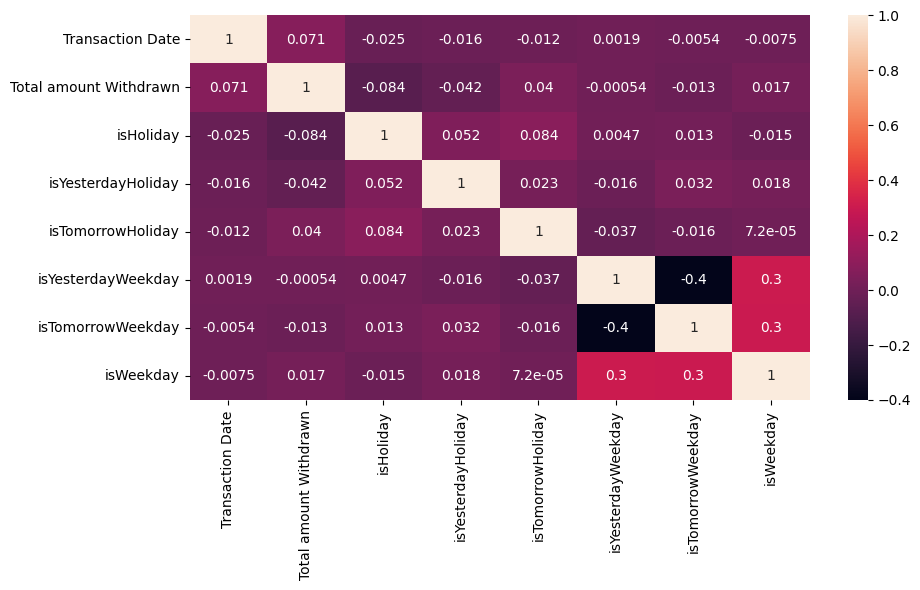

In [65]:
# columns_required = ['Transaction Date', 'Total amount Withdrawn', 'Weekday', 'Type', 
#                     'isHoliday', 'isYesterdayHoliday', 'isTomorrowHoliday', 'isYesterdayWeekday', 
#                     'isTomorrowWeekday', 'isWeekday']

# Medir weekday y type
columns_required = ['Transaction Date', 'Total amount Withdrawn', 
                    'isHoliday', 'isYesterdayHoliday', 'isTomorrowHoliday', 'isYesterdayWeekday', 
                    'isTomorrowWeekday', 'isWeekday']

corr_atm_df = bs_data[columns_required]

plt.figure(figsize=(10, 5))
sns.heatmap(corr_atm_df.corr(), annot=True)

## Correlation

<p> (isYesterdayWeekday, isTomorrowWeekday) have slight negative correlation and (isWeekday, isYesterdayWeekday), (isWeekday, isTomorrowWeekday) have slight positive correlation </p>

So there is no immediate need to drop these as of yet.
The current dataset is good for running the models as far as the values are concerned.

## Making Final Alterations to the original dataset

So we now include the newly obtained values and columns to our original dataset which had incorrect values or trivial columns.

In [34]:
new_agg.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Type', 'Weekday', 'Holiday Sequence',
       'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday',
       'isYesterdayWeekday', 'isTomorrowWeekday', 'isWeekday'],
      dtype='object')

## Dropping Festival Religion, Holiday Sequence & Working Day Columns

In [19]:
# NO LO EJECUTÉ
# new_agg.drop(['Festival Religion', 'Holiday Sequence', 'Working Day'], axis=1, inplace=True)

## Writing new csv

In [66]:
new_agg.to_csv('../data/aggregated_data_cleaning_complete.csv', index=False)

## Creating a new csv that already has all the unnecessary columns dropped and Rainfall Status column added

In [28]:
# new_cleaned_agg = new_agg.copy(deep=True)

In [29]:
# def rainfall_status_check(value):
#     if value == 0:
#         return "No Rain"
#     elif value < 2.5:
#         return "Light Rain"
#     elif value <= 7.6:
#         return "Moderate Rain"
#     elif value <= 50:
#         return "Heavy Rain"
#     else:
#         return "Violent Rain"

In [30]:
# new_cleaned_agg['Rainfall Status'] = new_cleaned_agg['precipMM'].apply(rainfall_status_check)

In [31]:
# new_cleaned_agg.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'maxtempC', 'mintempC',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday',
       'isYesterdayWeekday', 'isTomorrowWeekday', 'isWeekday',
       'Rainfall Status'],
      dtype='object')

In [32]:
# new_cleaned_agg.drop(['No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
#                       'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card', 
#                       'maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
#                       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 
#                       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 
#                       'visibility', 'winddirDegree', 'windspeedKmph'], axis=1, inplace=True)

## Final dataset look
This is final look of the amended dataset which has been cleaned and updated with suitable values that were obtained.
Keeping most columns categorical is something that will help the model identify patterns easily and a bit accurately.

In [33]:
# new_cleaned_agg.head()

,ATM Name,Transaction Date,Total amount Withdrawn,Weekday,Type,isYesterdayHoliday,isHoliday,isTomorrowHoliday,isYesterdayWeekday,isTomorrowWeekday,isWeekday,Rainfall Status
0,Big Street ATM,2011-01-01,123800,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
1,Mount Road ATM,2011-01-01,767900,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
2,Airport ATM,2011-01-01,503400,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
3,KK Nagar ATM,2011-01-01,945300,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
4,Christ College ATM,2011-01-01,287700,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain


This updated Dataset is now made into a csv file for further usage.

In [34]:
# new_cleaned_agg.to_csv('../data/cleaned_data.csv', index=False)